# Exercise 5

- 이번 과제에서는 한국, 독일, 일본, 그리고 미국의 산업생산지수 data를 이용해 수업 시간에 다룬 여러 계량모형들에 대한 실습을 진행합니다.

#### (1) 국가별 산업생산지수의 월별 추이를 그리시오. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('production_index.csv', index_col=0, parse_dates = True)

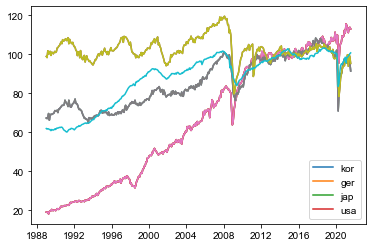

<Figure size 864x576 with 0 Axes>

In [4]:
#y data
data1 = np.array(df.iloc[:,:1])
data2 = np.array(df.iloc[:,:2])
data3 = np.array(df.iloc[:,:3])
data4 = np.array(df.iloc[:,:4])

#x data
xdata = np.array(df.index)
labels = ['kor','ger','jap','usa']
plt.plot(xdata,data1,label = 'kor')
plt.plot(xdata,data2,label = 'ger')
plt.plot(xdata,data3,label = 'jap')
plt.plot(xdata,data4,label = 'usa')
plt.legend(labels)
plt.style.use('seaborn')
plt.figure(figsize = (12,8))
plt.show()

#### (2) 최소자승법으로 다음의 모형을 추정하시오.
$$y_{kor} = \beta_0 + \beta_1y_{jp} + \beta_2y_{ger} + \beta_3y_{usa} + \epsilon$$
이 모형에서 발생하는 문제가 무엇이며 이를 어디서 확인할 수 있나요?

In [5]:
import statsmodels.api as sm

X = pd.DataFrame({'ger_pi':df['ger_pi'], 'jap_pi':df['jap_pi'],'usa_pi':df['usa_pi']})
ykor = pd.DataFrame(df['kor_pi'])
sm.add_constant(X)

ols = sm.OLS(ykor,X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 kor_pi   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          1.141e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                        0.00
Time:                        11:47:50   Log-Likelihood:                         -1359.5
No. Observations:                 392   AIC:                                      2725.
Df Residuals:                     389   BIC:                                      2737.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ger_pi         1.8362      0.061     30.036      0.000       1.716       1.956
jap_pi        -1.4244      0.026    -53.958      0.000      -1.476      -1.373
usa_pi         0.6303      0.057     11.073      0.000       0.518       0.742
==============================================================================
Omnibus:                       55.909   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.289
Skew:                           0.663   Prob(JB):                     4.25e-35
Kurtosis:                       5.817   Cond. No.                         32.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

각 국의 생산량이 서로의 생산량에 아무런 상관관계도 없는 변수가 아니기 때문에 문제가 발생함

#### (3) 각 변수에 대해 단위근 검정을 진행하시오(단, regression = 'c'로 설정).

(-0.4204933391755398,
 0.906620484423682,
 10,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1425.1384069496098)

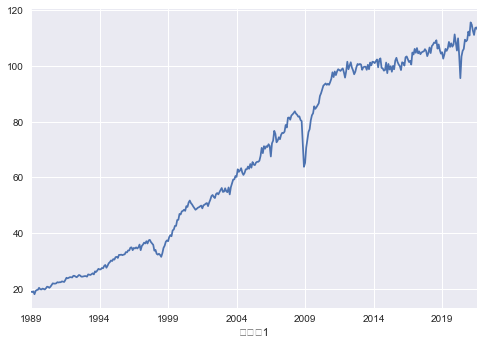

In [6]:
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

df['kor_pi'].plot()
adfuller(df['kor_pi'], regression='c')

(-1.625392799033828,
 0.46990321210074454,
 2,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 1534.4678568441584)

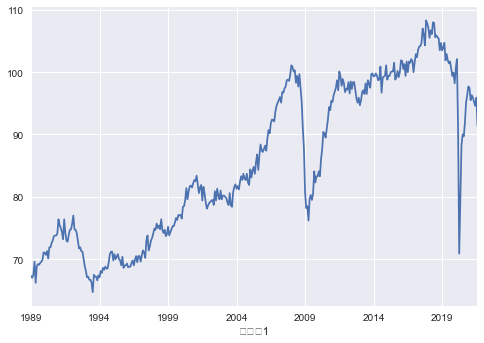

In [5]:
df['ger_pi'].plot()
adfuller(df['ger_pi'], regression='c')

(-3.654706787310492,
 0.004797278514957869,
 2,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 1584.160051811954)

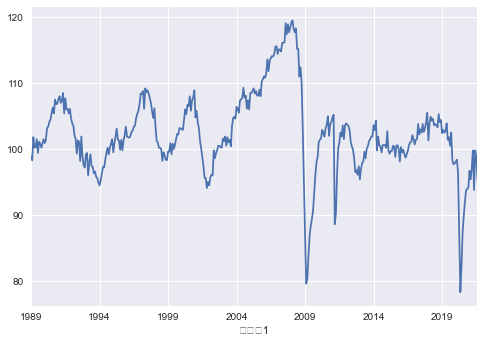

In [7]:
df['jap_pi'].plot()
adfuller(df['jap_pi'], regression='c')

(-1.6514746154565698,
 0.4562714828601087,
 2,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 1033.9203090415158)

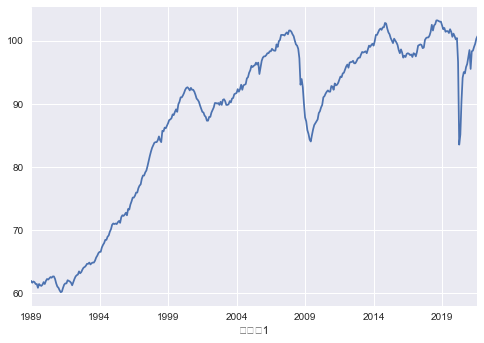

In [7]:
df['usa_pi'].plot()
adfuller(df['usa_pi'], regression='c')

#### (4) 각 변수들의 원자료를 변화율로 바꾼 후, 이들에 대해 다시 단위근 검정을 진행하시오(단, regression = 'c'로 설정).

(-2.070784119014643,
 0.25642353119175654,
 1,
 390,
 {'1%': -3.4472291365835566,
  '5%': -2.8689795375849223,
  '10%': -2.5707330834976987},
 -1778.2754176140993)

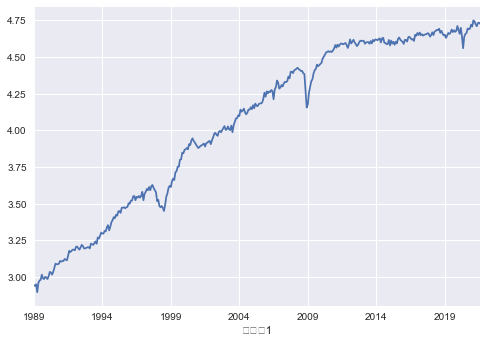

In [8]:
percentage = np.log(df[['kor_pi','ger_pi','jap_pi','usa_pi']])

percentage['kor_pi'].plot()
adfuller(percentage['kor_pi'], regression='c')

(-1.6563810826197765,
 0.45371466276503686,
 2,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 -1785.1480584639257)

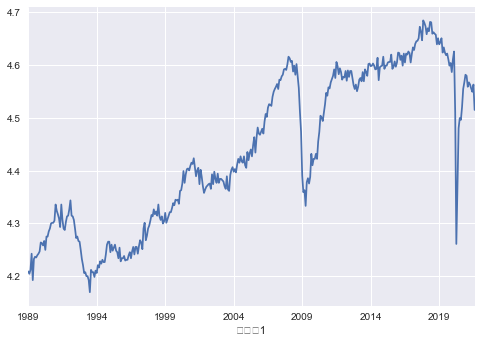

In [9]:
percentage['ger_pi'].plot()
adfuller(percentage['ger_pi'], regression='c')

(-3.896624507885398,
 0.002059829786978642,
 2,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 -1835.8775653941461)

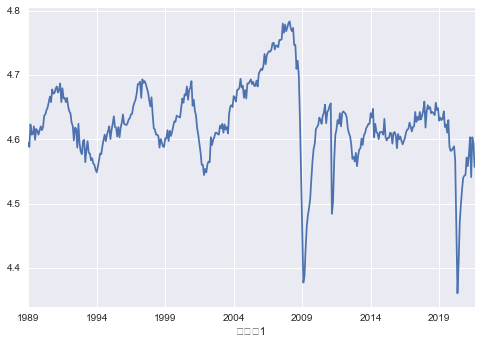

In [10]:
percentage['jap_pi'].plot()
adfuller(percentage['jap_pi'], regression='c')

(-1.8437380760629118,
 0.35897316917741223,
 2,
 389,
 {'1%': -3.447272819026727,
  '5%': -2.868998737588248,
  '10%': -2.5707433189709294},
 -2334.7251476800875)

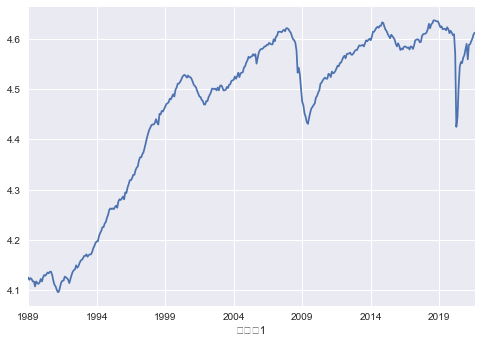

In [11]:
percentage['usa_pi'].plot()
adfuller(percentage['usa_pi'], regression='c')

#### (5) 일본의 산업생산지수 원자료(변화율 x)에 대해, acf와 pacf를 그리시오. 이로부터 어떤 결론을 도출할 수 있나요?

<Figure size 576x396 with 0 Axes>

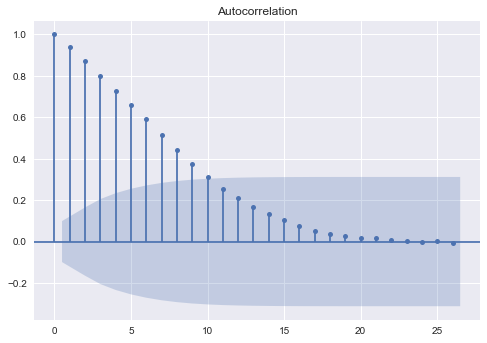

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
jap = percentage['jap_pi']

plt.figure()
plot_acf(np.array(jap))
plt.show()

<Figure size 576x396 with 0 Axes>

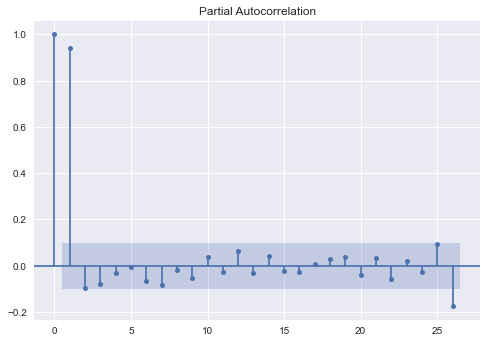

In [13]:
plt.figure()
plot_pacf(np.array(jap))
plt.show()

acf의 경우 correlation이 점진적으로 감소하는 형태이나, pacf의 경우 correlation이 두 기간이 지난 후 갑작스럽게 감소하여 이어지지 않는다. acf가 천천히 감소하는 형태를 보이고 있으므로 nonstationary 데이터라고 할 수 있다.

#### (6) 일본의 산업생산지수를 ARMA(p,q)로 modeling한다고 하자. 이때, AIC와 BIC를 기준으로 최적의 p, q를 도출하시오.

In [13]:
x = percentage['jap_pi']

res = sm.tsa.arma_order_select_ic(x, ic=["aic", "bic"], trend="nc")

In [14]:
res.aic_min_order

(2, 0)

In [15]:
res.bic_min_order

(1, 0)

In [17]:
m2 = sm.tsa.ARMA(x, (2, 0))
r = m2.fit(disp=False)
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                 jap_pi   No. Observations:                  392
Model:                     ARMA(2, 0)   Log Likelihood                 969.118
Method:                       css-mle   S.D. of innovations              0.020
Date:                Wed, 17 Nov 2021   AIC                          -1930.237
Time:                        10:04:19   BIC                          -1914.351
Sample:                    01-01-1989   HQIC                         -1923.941
                         - 08-01-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.6234      0.015    301.211      0.000       4.593       4.653
ar.L1.jap_pi     1.0416      0.050     20.700      0.000       0.943       1.140
ar.L2.jap_pi    -0.1067      0.050     -2.11

In [20]:
m2 = sm.tsa.ARMA(x, (1, 0))
r = m2.fit(disp=False)
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                 jap_pi   No. Observations:                  392
Model:                     ARMA(1, 0)   Log Likelihood                 966.888
Method:                       css-mle   S.D. of innovations              0.020
Date:                Wed, 17 Nov 2021   AIC                          -1927.775
Time:                        11:49:25   BIC                          -1915.862
Sample:                    01-01-1989   HQIC                         -1923.054
                         - 08-01-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.6228      0.017    273.564      0.000       4.590       4.656
ar.L1.jap_pi     0.9410      0.017     56.310      0.000       0.908       0.974
                                    Roots   

#### (7) 위의 결과를 바탕으로 일본의 산업생산지수에 대한 ARMA(p,q) 모형을 만들고, ARMA 모형에서 예측된 값과 실제 값을 산포도로 그리시오. 산포도를 기준으로 판단했을때, 일본의 산업생산지수에 대한 ARMA 모형은 괜찮은 모형입니까?

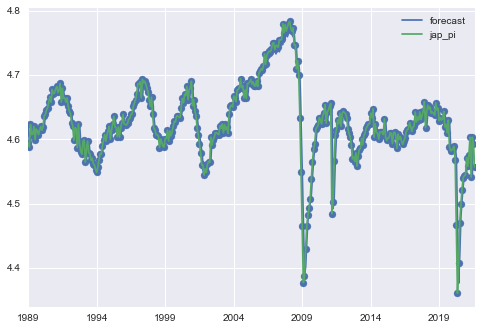

In [21]:
r.plot_predict()
plt.scatter(percentage.index,percentage['jap_pi'])
plt.show()

예측치와 생산지수가 비슷한 경향성을 보이기 때문에 괜찮은 모형이라고 할 수 있다.